In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# statsmodel

https://www.statsmodels.org/stable/index.html

# Datasets buildin statsmodel

Time Series datasets available in stata, check the link below

https://www.statsmodels.org/stable/datasets/index.html

In [2]:
import statsmodels.tsa.arima_process as arima_process

In [3]:
# First create an Autoregressive moving average (ARMA) process object
process =arima_process.ArmaProcess(ar=[1,-0.8], ma=[1])

In [4]:
process  # this is an ARMA process object

ArmaProcess([1.0, -0.8], [1.0], nobs=100) at 0x1c9c9dd4310

# Take Sample

In [5]:
z= process.generate_sample(nsample=100)

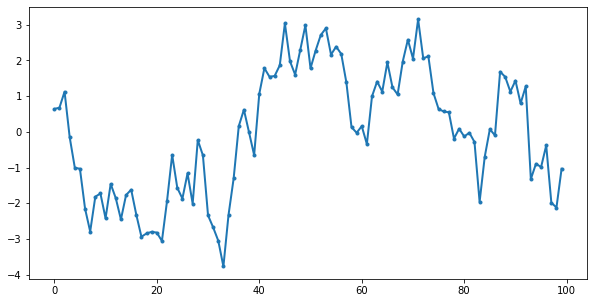

In [6]:
# Plot the z values 
plt.figure(figsize=(10,5))
plt.plot(z, lw=2,marker='.')

This is stable process

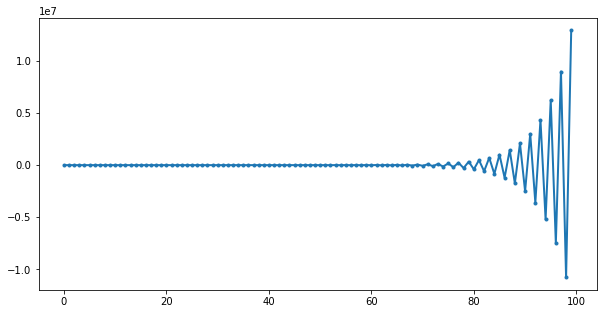

In [15]:
# First create an Autoregressive moving average (ARMA) process object
process1 =arima_process.ArmaProcess(ar=[1,1.2], ma=[1])
z1= process1.generate_sample(nsample=100)# Plot the z values 
plt.figure(figsize=(10,5))
plt.plot(z1, lw=2,marker='.')

Unstable process

# Plotting Autocorrelation function (ACF)

In [7]:
acf=process.acf(lags=20)
acf

array([1.        , 0.8       , 0.64      , 0.512     , 0.4096    ,
       0.32768   , 0.262144  , 0.2097152 , 0.16777216, 0.13421773,
       0.10737418, 0.08589935, 0.06871948, 0.05497558, 0.04398047,
       0.03518437, 0.0281475 , 0.022518  , 0.0180144 , 0.01441152])

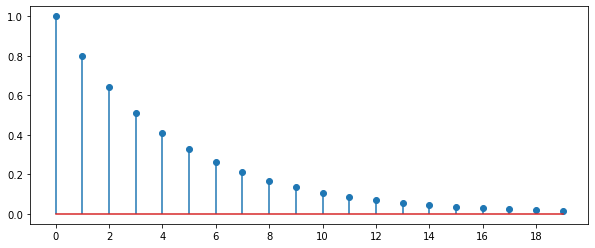

In [8]:
plt.figure(figsize=(10,4))
plt.stem(acf)
plt.xticks(ticks=range(0,20,2))
plt.show()

The autocorrelation decay exponentially with the number of lags, which is typically a stationary process.

# Plotting Partial Autocorrelation Function

In [9]:
pacf=process.pacf(lags=20)
pacf

array([ 1.00000000e+00,  8.00000000e-01,  1.48029737e-16, -1.35693925e-16,
        4.31753398e-17, -1.35693925e-16,  1.41861831e-16, -7.70988212e-17,
        8.94346325e-17, -7.70988212e-17,  3.54654577e-17, -1.07938350e-17,
        3.23815049e-17, -3.08395285e-17,  1.92747053e-17, -2.31296463e-17,
        1.38777878e-17, -4.24043516e-18,  3.85494106e-19,  9.05911149e-18])

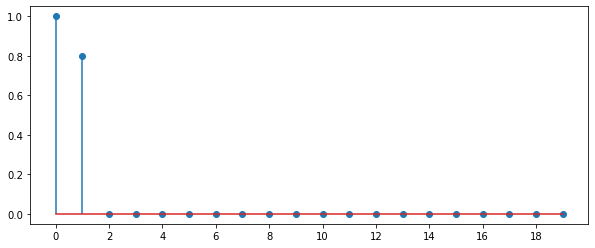

In [10]:
plt.figure(figsize=(10,4))
plt.stem(pacf)
plt.xticks(ticks=range(0,20,2))
plt.show()

# Plotting Sample Autocorrelation

In [11]:
import statsmodels.graphics.tsaplots as tsaplots


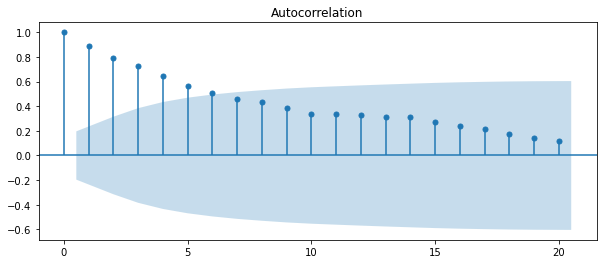

In [12]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(z,ax=ax,lags=20)
plt.show()

# Plotting Sample partial Autocorrelation Function

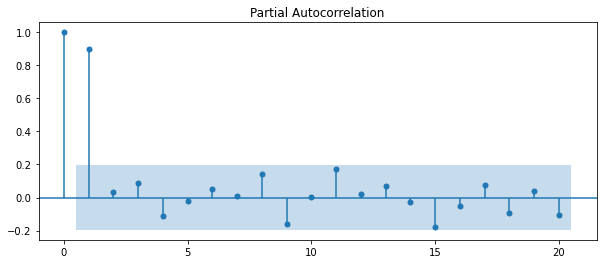

In [14]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_pacf(z,ax=ax,lags=20)
plt.show()

In [21]:
#statsmodels.tsa.stattools.pacf
from statsmodels.tsa.stattools import pacf, acf

In [22]:
# partial autocorrelation arrays for the sample data
pacf_stattools=pacf(z, nlags=20)
pacf_stattools

array([ 1.00000000e+00,  8.96795161e-01,  3.33104871e-02,  8.83235297e-02,
       -1.11693109e-01, -2.17337194e-02,  4.88148584e-02,  1.16333907e-02,
        1.44320678e-01, -1.60844581e-01,  6.04084988e-04,  1.73829088e-01,
        1.83174315e-02,  6.72499620e-02, -2.68756495e-02, -1.75860771e-01,
       -5.34187259e-02,  7.50820574e-02, -9.24706107e-02,  4.24084871e-02,
       -1.05101144e-01])

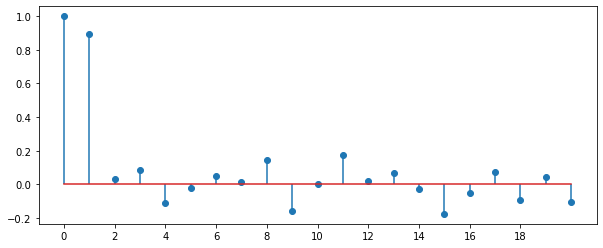

In [19]:
plt.figure(figsize=(10,4))
plt.stem(pacf_stattools)
plt.xticks(ticks=range(0,20,2))
plt.show()

# Autocorrelation Function on real data 

# Load Sunspots data

In [23]:
sunspot=pd.read_csv('monthly-sunspots.csv')

In [24]:
sunspot.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [25]:
sunspot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [26]:
sunspot.loc[0,'Month']

'1749-01'

In [27]:
# first convert the date into timestamp objects
pd.to_datetime(sunspot.loc[0,'Month'])

Timestamp('1749-01-01 00:00:00')

In [28]:
sunspot=sunspot.set_index(pd.to_datetime(sunspot['Month']))
sunspot

,Month,Sunspots
Month,,
1749-01-01,1749-01,58.0
1749-02-01,1749-02,62.6
1749-03-01,1749-03,70.0
1749-04-01,1749-04,55.7
1749-05-01,1749-05,85.0
...,...,...
1983-08-01,1983-08,71.8
1983-09-01,1983-09,50.3
1983-10-01,1983-10,55.8


In [29]:
sunspot.drop(['Month'], axis=1,inplace=True)
sunspot

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


In [30]:
# rename it
sunspot.rename(columns={'Sunspots':'sunspot_values'}, inplace=True)
sunspot

,sunspot_values
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


# plot it

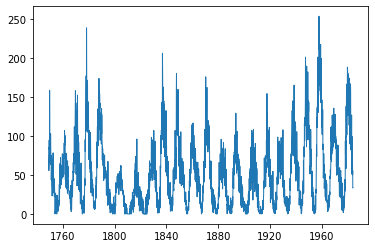

In [31]:
plt.plot(sunspot,lw=1)

# Is this data stationary?

In [3]:
# Calculate the acf and pacf values
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# acf values
auto_corr =acf(sunspot,fft=True)
auto_corr 

NameError: name 'sunspot' is not defined

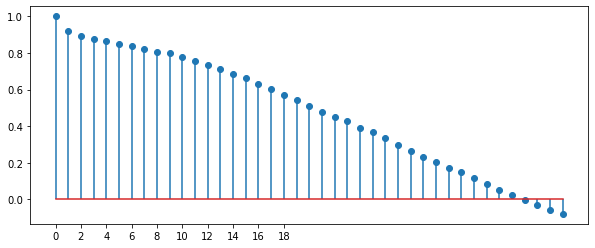

In [37]:
#lets see
plt.figure(figsize=(10,4))
plt.stem(auto_corr)
plt.xticks(ticks=range(0,20,2))
plt.show()

In [39]:
#Partial autocorrelation function values 
auto_corr_pacf =pacf(sunspot)
auto_corr_pacf

array([ 1.        ,  0.92201305,  0.27350449,  0.19031953,  0.13701391,
        0.06558871,  0.04502383, -0.00468782,  0.01389472,  0.04613691,
       -0.04553997, -0.05885782, -0.05969528, -0.07833553, -0.05715661,
       -0.04753298, -0.10148616, -0.07691489, -0.10435071, -0.0394449 ,
       -0.0567142 , -0.05627108, -0.01443059,  0.01323066, -0.06914032,
        0.04529577, -0.03391519, -0.05050149, -0.02905697, -0.01920451,
        0.01219519, -0.00530011,  0.02693888, -0.01671021, -0.03911114,
       -0.01739194, -0.00220558, -0.00421434, -0.00249766, -0.01194055,
        0.02687521])

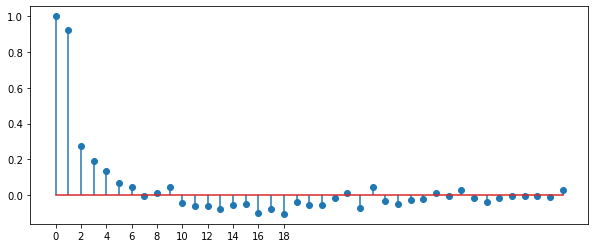

In [40]:
#lets see
plt.figure(figsize=(10,4))
plt.stem(auto_corr_pacf)
plt.xticks(ticks=range(0,20,2))
plt.show()

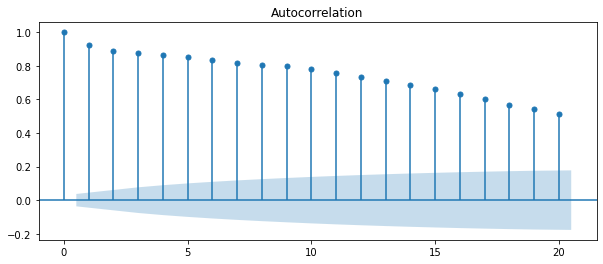

In [41]:
#Second method to calculate the acf and pacf using tsaplots
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(sunspot,ax=ax,lags=20)
plt.show()

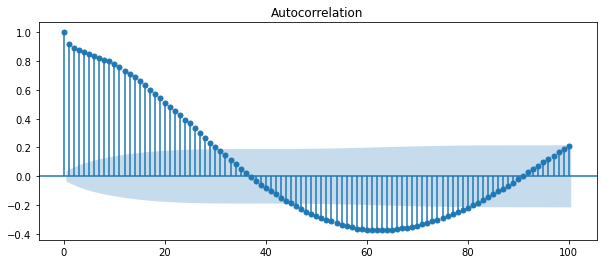

In [74]:
#lets see
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(sunspot,ax=ax,lags=100)
plt.show()

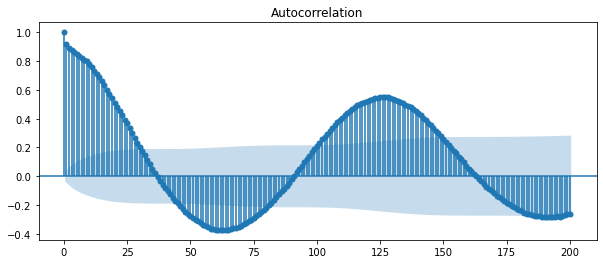

In [75]:
#lets see
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(sunspot,ax=ax,lags=200)
plt.show()

 # So the sunspot is not stationary

# To make it stationary, one way is to take the difference

Here instead of plotting each value, plot the difference of each value`

# take difference

In [76]:
sunspot.diff()

,sunspot_values
Month,
1749-01-01,NaN
1749-02-01,4.6
1749-03-01,7.4
1749-04-01,-14.3
1749-05-01,29.3
...,...
1983-08-01,-10.4
1983-09-01,-21.5
1983-10-01,5.5


In [78]:
diff_sunspot=sunspot.diff().dropna()

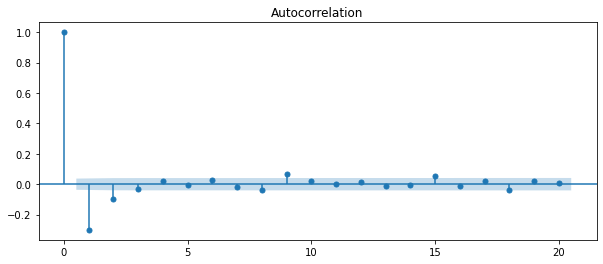

In [79]:
# see Autocorrelation
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(diff_sunspot,ax=ax,lags=20)
plt.show()

This is a good indication, even though the sunspot is not stationary, may be the difference of sunspot from one month to the other is stationary.

In [88]:
from statsmodels.datasets import nile

In [89]:
nile_df = nile.load_pandas().data
nile_df.head()

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0


In [90]:
from statsmodels.datasets import sunspots
sun_df= sunspots.load_pandas().data
sun_df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
